In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pwd

'C:\\Users\\CLIENTE'

In [3]:
cd "E:\DATASETS\Diamantes\"

E:\DATASETS\Diamantes


In [4]:
df1 = pd.read_csv("Diamantes.csv")

In [5]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df1 = df1.drop("Unnamed: 0", axis = 1)

In [7]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df1.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
L = ('carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',"x","y","z")

for x in L:
    print(x, "tiene:   ", df1[x].nunique())

carat tiene:    273
cut tiene:    5
color tiene:    7
clarity tiene:    8
depth tiene:    184
table tiene:    127
price tiene:    11602
x tiene:    554
y tiene:    552
z tiene:    375


In [12]:
L = ('cut', 'color', 'clarity')

for x in L:
    print( df1[x].value_counts())
    print( "*" *30)

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64
******************************
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
******************************
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
******************************


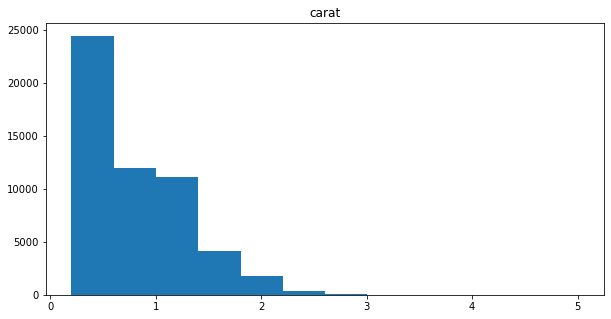

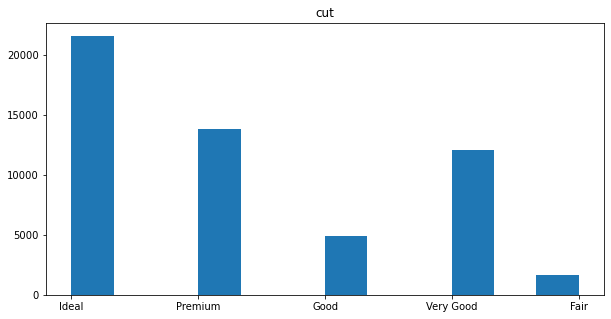

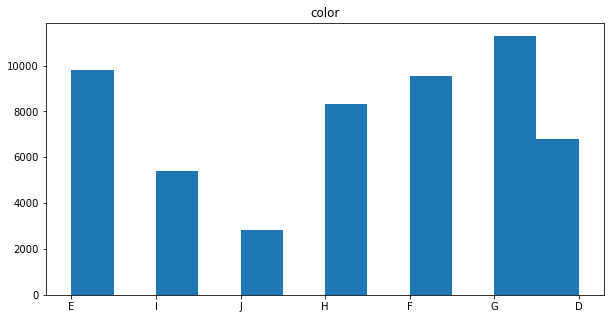

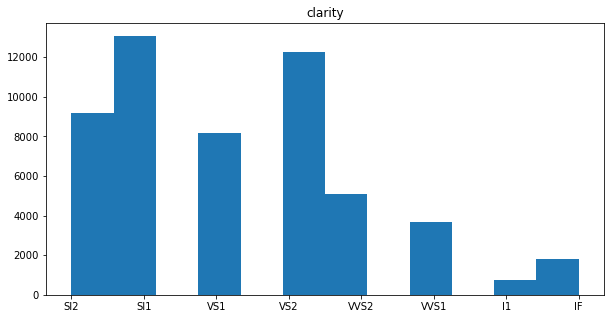

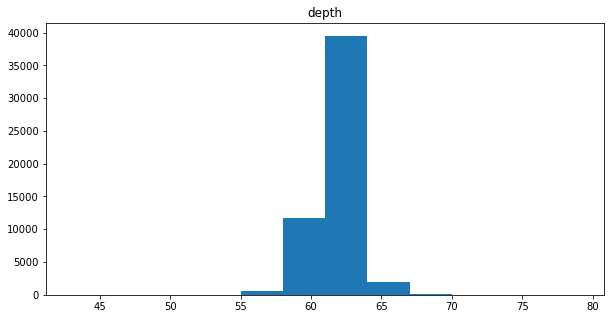

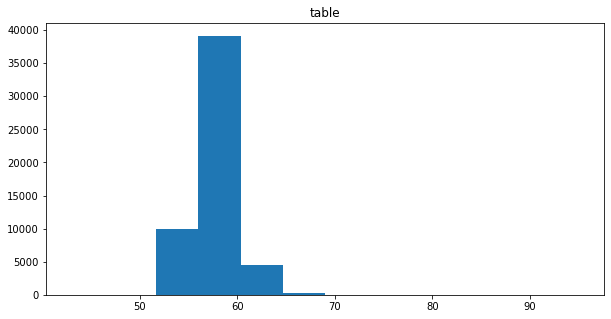

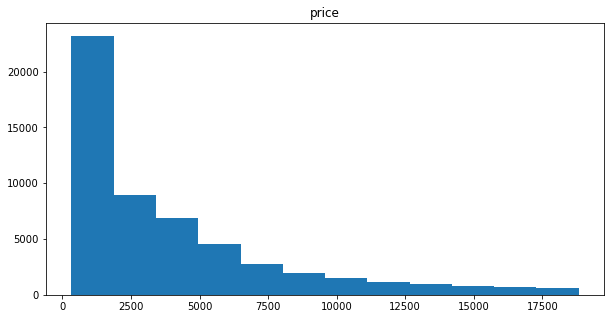

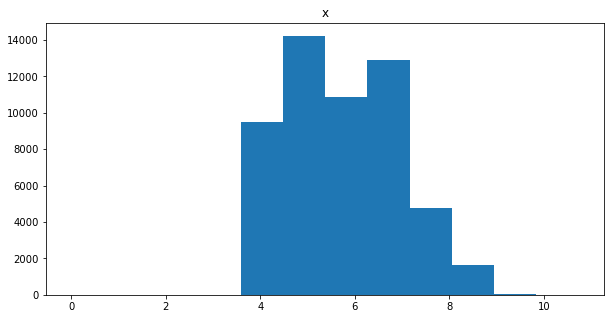

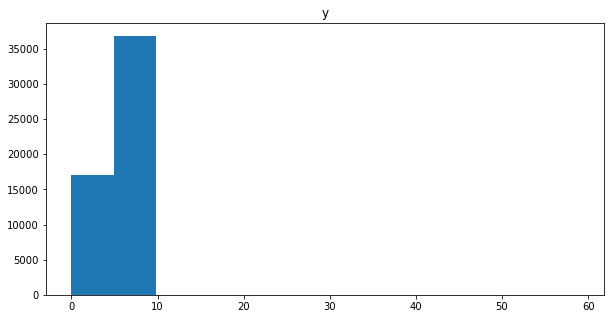

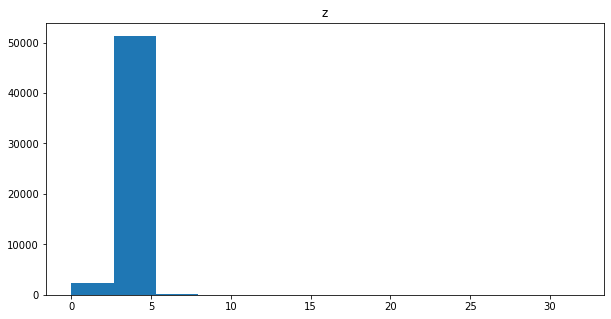

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
L = ('carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',"x","y","z")
for u in L:
    plt.figure(figsize=(10,5))
    plt.hist(df1[u], bins = 12)
    plt.xlabel("")
    plt.ylabel("")
    plt.title("%s" % u)

Crear categoricas (onehot)

In [13]:
Dummies = df1[['cut', 'color', 'clarity']]

In [14]:
df2=df1.copy()

In [15]:
y = df2[["price"]]
df2 = df2.drop(['cut', 'color', 'clarity',"price"], axis=1)

In [16]:
train_df_mean = df2.mean()
train_df_std = df2.std()
train_df_norm = (df2 - train_df_mean)/train_df_std

In [17]:
df3= train_df_norm.copy()

In [18]:
df3.head(4)

,carat,depth,table,x,y,z
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737


In [19]:
Categoricals = pd.get_dummies(Dummies[['cut', 'color', 'clarity']])

In [20]:
df3 = pd.concat([df3,Categoricals,y],axis = 1)

In [21]:
df3.head(4)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334


Mirar correlaciones

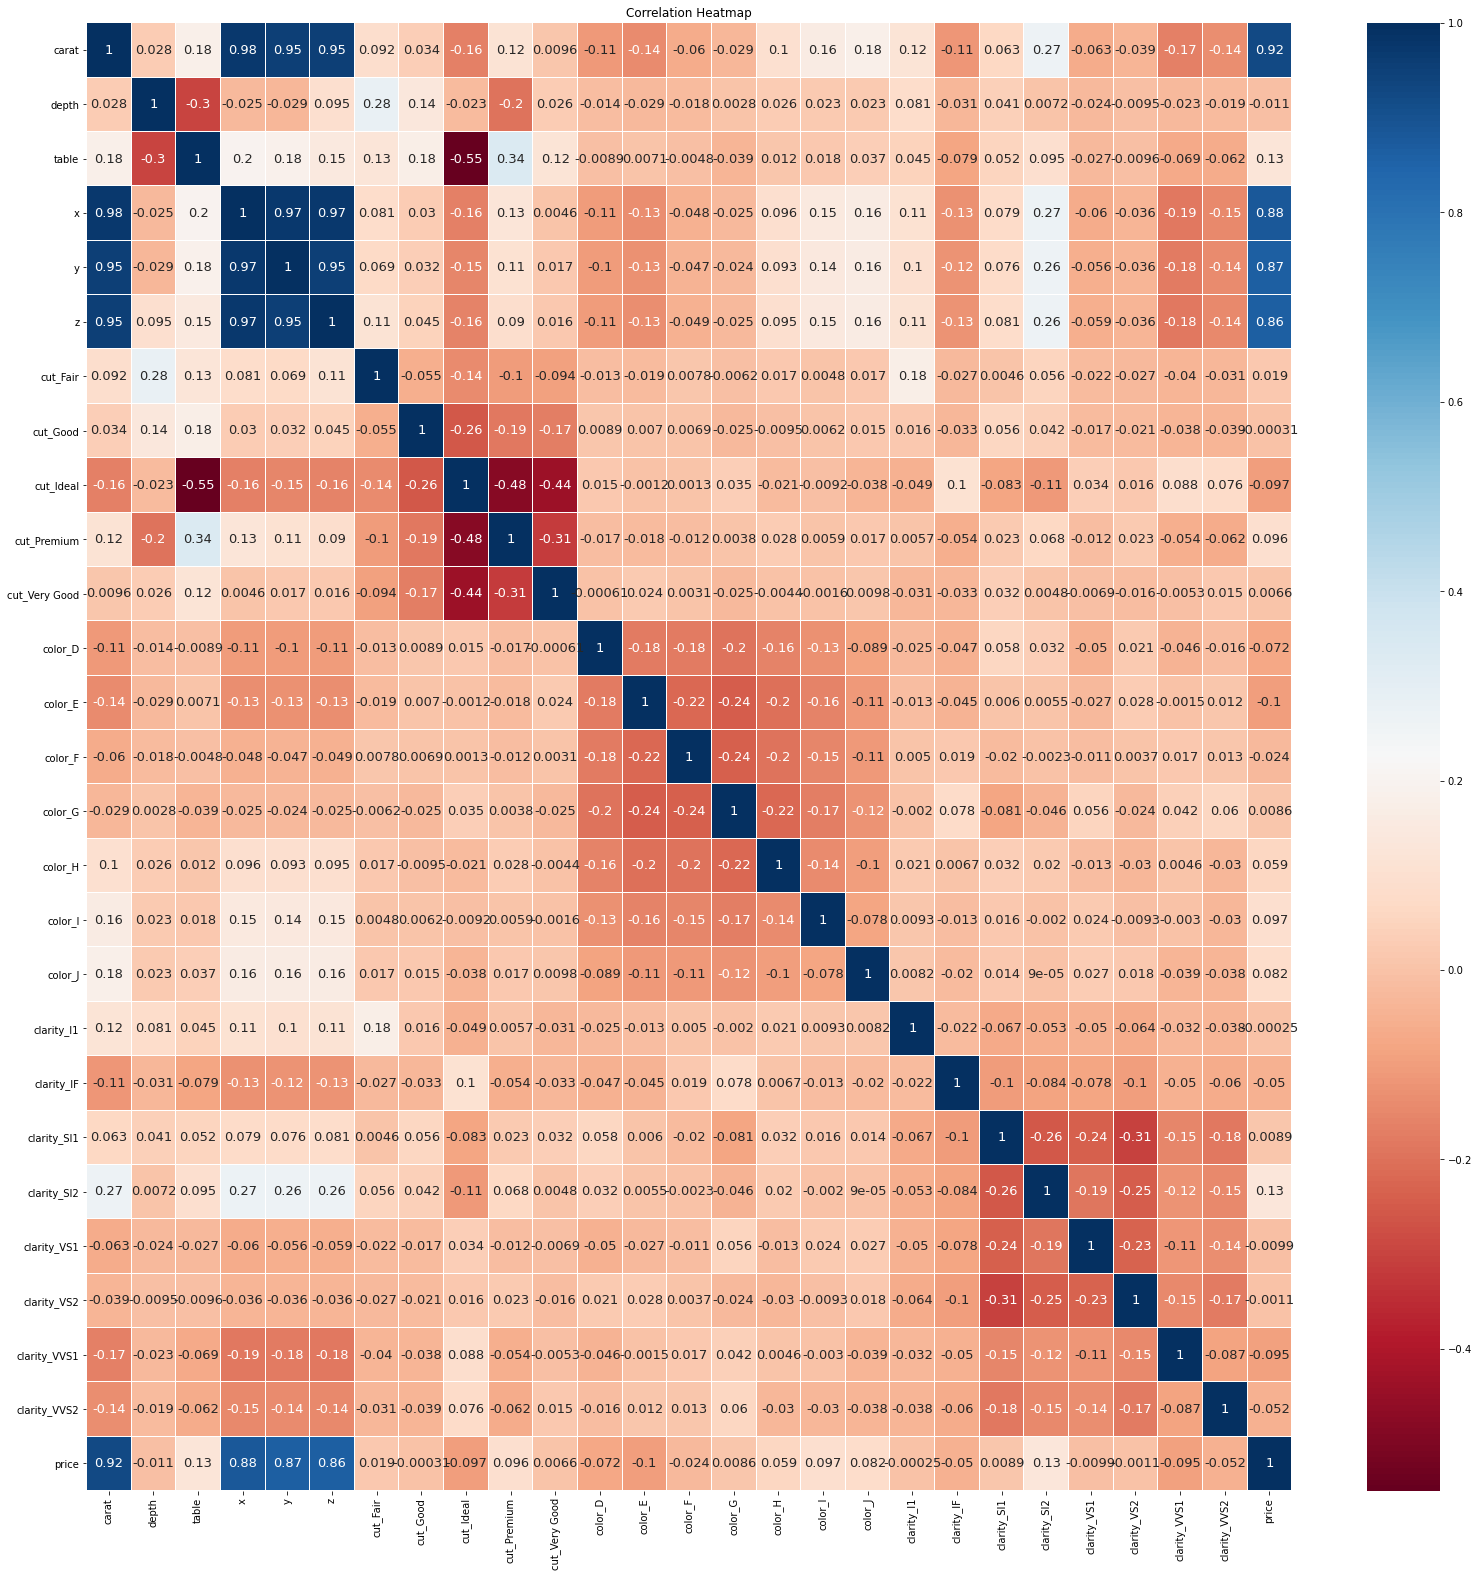

In [24]:
plt.figure(figsize=(27,27));
sns.heatmap(df3.corr(),annot=True,cmap='RdBu',linewidth=0.01, annot_kws={'size': 13});
plt.title('Correlation Heatmap',fontsize=12,fontweight=3);

Las correlaciones muestran que el precio depende mucho de la variable carat y de los x,y,z (x: length in mm, y: width in mm,z: depth in mm). Sin embargo, se debe prestar atención al PROBLEMA DE LA MULTICOLINEALIDAD.

Este modelo, sin embargo, se pedue predecir fácilmente con la variable CARAT. Ya que tienen una correlación muy alta.

In [24]:
df3['table_xy'] = (df3['table'].mean()*(df3['x']*df3['y']).mean()-df3['table']*(df3['x']*df3['y']))
df3['depth_z'] = (df3['depth'].mean()*df3['z'].mean()-df3['depth']*df3['z'])

In [26]:
Y = df3[["price"]]
X=df3.drop("price",axis=1)

Se llaman a los modelos que se van usar, scores y losses

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [27]:
# Con RandomForest
acc=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
    model = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=1)
    model.fit(X_train,y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc.append(r2_score(y_test.values.ravel(), y_pred))

In [28]:
y_pred = model.predict(X_test)
r2_score(y_test.values.ravel(), y_pred)

0.9800505086270717

In [29]:
acc

[0.9781314159868646,
 0.9795320754005873,
 0.9796153260794581,
 0.9810592448357489,
 0.9811154871870943,
 0.9803676741477361,
 0.9800505086270717]

In [30]:
# Con Regresion Linear

lm=LinearRegression().fit(X_train,y_train)

mse(lm.predict(X_train),y_train,squared=False), mse(lm.predict(X_test),y_test,squared=False)

(1126.823982552178, 1087.9770396266413)

In [31]:
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.9205865911530444
0.9241860343868366


In [32]:
y_pred = lm.predict(X_test)
r2_score(y_test.values.ravel(), y_pred)

0.9241860343868366

Con Feature engineering

In [25]:
df4 = df3.copy()

df4 = df4.drop(["table_xy","depth_z"], axis=1)

In [26]:
df4.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,-1.029401,1.082402,0.242890,-1.240190,-1.212261,-1.117688,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


In [33]:
y1 = df4[["price"]]
x1 = df4.drop("price",axis=1)

In [ ]:
acc2=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train2,X_test2,y_train2,y_test2 = train_test_split(x1,y1,test_size=0.2,random_state=i)
    model2 = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, random_state=1)
    model2.fit(X_train2,y_train2.values.ravel())
    y_pred2 = model2.predict(X_test2)
    acc2.append(r2_score(y_test2.values.ravel(), y_pred2))

In [ ]:
y_pred2 = model2.predict(X_test2)
r2_score(y_test2.values.ravel(), y_pred2)

In [ ]:
acc2

In [39]:
lm2=LinearRegression().fit(X_train2,y_train2)

mse(lm2.predict(X_train2),y_train2,squared=False), mse(lm2.predict(X_test2),y_test2,squared=False)

(1136.9524916842438, 1102.1185428737554)

In [40]:
print(lm2.score(X_train2,y_train2))
print(lm2.score(X_test2,y_test2))

0.9191525528822694
0.9222023690688379


In [41]:
y_pred2 = lm2.predict(X_test2)
r2_score(y_test2.values.ravel(), y_pred2)

0.9222023690688379

##### Resolviendo el problema de la Multicolinealidad

In [42]:
import statsmodels.formula.api as smf

In [43]:
lm_x = smf.ols(formula="x~y+z+carat", data= df4).fit()
rsquared = lm_x.rsquared
VIF = 1/(1-rsquared)
VIF

47.86182699924188

In [44]:
lm_y = smf.ols(formula="y~x+z+carat", data= df4).fit()
rsquared = lm_x.rsquared
VIF = 1/(1-rsquared)
VIF

47.86182699924188

In [45]:
lm_x = smf.ols(formula="z~x+y+carat", data= df4).fit()
rsquared = lm_x.rsquared
VIF = 1/(1-rsquared)
VIF

17.846590839832363

In [46]:
lm_x = smf.ols(formula="carat~y+z+x", data= df4).fit()
rsquared = lm_x.rsquared
VIF = 1/(1-rsquared)
VIF

20.667811827154015

In [50]:
###      cut_Ideal, poca colinearidad
lm_x = smf.ols(formula="table~cut_Ideal", data= df5).fit()
rsquared = lm_x.rsquared
VIF = 1/(1-rsquared)
VIF

1.432751047591402

En todos los casos los VIF son signifcativos, por lo tanto se tienen que eliminar o busca rotra forma de resolve rel problema

##### Se eliminan todos los valores con VIF altos entre ellos excepto uno

In [27]:
df5 =df4.copy()

In [28]:
df5.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,-1.029401,1.082402,0.242890,-1.240190,-1.212261,-1.117688,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


In [29]:
df5 = df5.drop(["x","y","z"], axis=1)
### Se eliminana las variables x y z por la maldición de la Multicolinealidad. 

In [30]:
y2 = df5[["price"]]
x2 = df5.drop("price",axis=1)

In [53]:
y2.head()

,price
0,326
1,326
2,327
3,334
4,335


In [54]:
acc3=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train3,X_test3, y_train3,y_test3 = train_test_split(x2,y2,test_size=0.2,random_state=i)
    model3 = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=1)
    model3.fit(X_train3,y_train3.values.ravel())
    y_pred3 = model3.predict(X_test3)
    acc3.append(r2_score(y_test3.values.ravel(), y_pred3))

In [55]:
acc3

[0.9797149233424144,
 0.9805664262244896,
 0.9795716432399117,
 0.9811245245564648,
 0.9805139322385353,
 0.9813128112850029,
 0.9808057174552535]

In [56]:
X_train3,X_test3, y_train3,y_test3 = train_test_split(x2,y2,test_size=0.2,random_state=2)

In [57]:
lm3=LinearRegression().fit(X_train3,y_train3)

mse(lm3.predict(X_train3),y_train3,squared=False), mse(lm3.predict(X_test3),y_test3,squared=False)

(1157.54365407815, 1149.4711869195967)

In [58]:
print(lm3.score(X_train3,y_train3))
print(lm3.score(X_test3,y_test3))

0.9161832761963641
0.9154520289682624


In [59]:
y_pred3 = lm3.predict(X_test3)
r2_score(y_test3.values.ravel(), y_pred3)

### Los resultados sin las variables Multicolineales, son similares a los anteriores, y a su vez son buenos.

0.9154520289682624

Deshaciendose de la Multicolinealidad con PLSRegression

In [32]:
df6 =df4.copy()

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [62]:
df6.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,-1.029401,1.082402,0.242890,-1.240190,-1.212261,-1.117688,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:94: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:324: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:333: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(e

C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:94: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:324: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:333: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(e

Text(0.5, 1.0, 'hp')

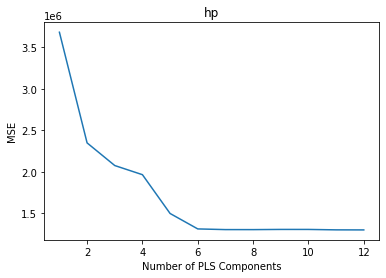

In [63]:
Y4 = df6[["price"]]
X4 = df6.drop("price",axis=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X4)

score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), Y4, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 13):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X4), Y4, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

Entre 10 y 12 es suficient

In [64]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X4,Y4,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=15)
PLS = pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

print(PLS.score(X_train,y_train))
print(PLS.score(X_test,y_test))

###Los resultados de la PLSregresssion son bajos comparados con el random Forest SIN y CON x,y,z

0.8757986918236881
0.879343105576267


C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


In [65]:
y_pred4 = pls.predict(X_test)
r2_score(y_test.values.ravel(), y_pred4)

C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


0.879343105576267

##### Aplicando el PCA

In [66]:
df6 = df4.copy()

In [67]:
df6.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198178,-0.174032,-1.099663,-1.587868,-1.536224,-1.571152,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240372,-1.360664,1.585442,-1.641356,-1.658805,-1.741201,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,-1.198178,-3.384918,3.375513,-1.498720,-1.457422,-1.741201,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071595,0.454185,0.242890,-1.364997,-1.317330,-1.287737,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,-1.029401,1.082402,0.242890,-1.240190,-1.212261,-1.117688,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


In [68]:
from sklearn.decomposition import PCA

In [69]:
Y= df6[["price"]]
X = df6.drop("price",axis=1)

In [70]:
pca = PCA(n_components=26)

X_PCA = pca.fit_transform(X)

In [71]:
X_PCA.shape

(53943, 26)

In [72]:
acc5=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train3,X_test3, y_train3,y_test3 = train_test_split(X_PCA,Y,test_size=0.2,random_state=i)
    model3 = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=1)
    model3.fit(X_train3,y_train3.values.ravel())
    y_pred3 = model3.predict(X_test3)
    acc5.append(r2_score(y_test3.values.ravel(), y_pred3))

In [73]:
acc5
## EL PCA da unos resultados ligeramente inferiores

[0.9756935706678668,
 0.9776023311974886,
 0.9765277511339474,
 0.9761831549995558,
 0.9771418608845683,
 0.9785712679288017,
 0.9777245251686341]

In [74]:
lm3=LinearRegression().fit(X_train3,y_train3)

#mse(lm3.predict(X_train3),y_train3,squared=False), mse(lm3.predict(X_test3),y_test3,squared=False)

In [75]:
print(lm3.score(X_train3,y_train3))
print(lm3.score(X_test3,y_test3))

0.9191528514877809
0.9221982562588074


PCA con % de componentes

In [76]:

pca = PCA(.99)

X_PCA = pca.fit_transform(X)

In [77]:
X_PCA.shape

(53943, 20)

In [166]:
X_PCA

array([[-3.06227135, -0.46454792, -0.70115538, ..., -0.25022038,
        -0.07400575, -0.11561908],
       [-2.86535141,  2.52429388,  0.47544488, ..., -0.33109116,
        -0.04327904, -0.06599477],
       [-2.50012189,  4.98204011,  0.01752966, ..., -0.33732486,
         0.03040392, -0.05317165],
       ...,
       [-0.20265243,  0.02540831, -1.06220463, ...,  0.04587867,
         0.04906205,  0.03424598],
       [ 0.14125106,  2.52401251,  0.42209732, ...,  0.05820566,
         0.01364381, -0.02059566],
       [-0.08117731,  1.15560107, -0.03495933, ...,  0.06882039,
         0.01911525,  0.03155379]])

In [141]:
acc5=[]
for i in [0, 1, 2, 3, 4, 5, 42]:
    X_train3,X_test3, y_train3,y_test3 = train_test_split(X_PCA,Y,test_size=0.2,random_state=i)
    model3 = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=1)
    model3.fit(X_train3,y_train3.values.ravel())
    y_pred3 = model3.predict(X_test3)
    acc5.append(r2_score(y_test3.values.ravel(), y_pred3))

In [143]:
len(X_train3)

43154

In [144]:
X_PCA

array([[-3.06227135, -0.46454792, -0.70115538, ..., -0.25022038,
        -0.07400575, -0.11561908],
       [-2.86535141,  2.52429388,  0.47544488, ..., -0.33109116,
        -0.04327904, -0.06599477],
       [-2.50012189,  4.98204011,  0.01752966, ..., -0.33732486,
         0.03040392, -0.05317165],
       ...,
       [-0.20265243,  0.02540831, -1.06220463, ...,  0.04587867,
         0.04906205,  0.03424598],
       [ 0.14125106,  2.52401251,  0.42209732, ...,  0.05820566,
         0.01364381, -0.02059566],
       [-0.08117731,  1.15560107, -0.03495933, ...,  0.06882039,
         0.01911525,  0.03155379]])

In [79]:
acc5
## EL PCA con 95% da unos resultados ligeramente inferiores al anterior PCA con 26 components
## Con random forest

[0.9741137273250464,
 0.9746373750979329,
 0.9733850368920899,
 0.9738337966818619,
 0.9756057738987618,
 0.9765553513273932,
 0.9746093495846351]

In [80]:

lm3=LinearRegression().fit(X_train3,y_train3)

#mse(lm3.predict(X_train3),y_train3,squared=False), mse(lm3.predict(X_test3),y_test3,squared=False)

In [81]:
print(lm3.score(X_train3,y_train3))
print(lm3.score(X_test3,y_test3))
## EL PCA con .95 da resultados bajos del 82
## EL PCA con .99 da reusltados del .89 .87

0.8945259079285882
0.8736201998345268


## Prediciendo 1a1

In [33]:
N_Y = df6[['price']]

In [34]:
N_X = df6[['carat', 'depth', 'table', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good']]

In [35]:
#XUXAZA[['carat', 'depth', 'table']] = XUXAZA['size'].apply(lambda x: int(x.split(' ')[0]))
N_X[['carat', 'depth', 'table']] = N_X[['carat', 'depth', 'table']].round(1)

C:\Users\CLIENTE\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
N_X.head(3)

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,-1.2,-0.2,-1.1,0,0,1,0,0
1,-1.2,-1.4,1.6,0,0,0,1,0
2,-1.2,-3.4,3.4,0,1,0,0,0


In [55]:
X_train3,X_test3, y_train3,y_test3 = train_test_split(N_X,N_Y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train3,y_train3)
lr_clf.score(X_test3,y_test3)

0.8598349764284189

In [57]:
def predict_price(vari1,vari2,vari3,vari4):    
    loc_index = np.where(N_X.columns==vari1)[0][0]

    x = np.zeros(len(N_X.columns))
    x[0] = vari2
    x[1] = vari3
    x[2] = vari4
       
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [61]:
predict_price("cut_Ideal" ,-1.2, 0.2, -0.7)

### Predice correctamente

C:\Users\CLIENTE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-287.25])

In [59]:
lr_clf.predict(X_test3)

array([[-287.25],
       [7370.  ],
       [  37.  ],
       ...,
       [1556.75],
       [5726.  ],
       [ 124.  ]])

In [ ]:
("cut_Very Good" ,0.9, 0.8, -1.5)

In [60]:
X_test3

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1388,-1.2,0.2,-0.7,0,0,1,0,0
19841,0.9,0.8,-1.5,0,0,0,0,1
41647,-0.6,-0.0,4.7,1,0,0,0,0
41741,-0.6,0.7,-0.7,0,0,1,0,0
17244,1.6,0.4,-1.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
45518,-0.6,0.4,-1.1,0,0,1,0,0
30056,-0.8,-0.3,1.1,0,0,0,1,0
43748,-0.6,0.5,0.2,0,0,0,1,0
4998,0.6,1.0,0.7,0,1,0,0,0


### Por temas de facilidad, solo usaremos el modelo de Regresión Logística para realizar el deployment de la APP

In [64]:
#Importar el modelo a PCIKLE

import pickle
with open('diamond_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in N_X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))